**CLASSIFICATION**

<> Classification is a supervised machine learning method where the model tries to predict the correct label of a given input data.

<>In classification, the model is fully trained using the training data, and then it is evaluated on test data before being used to perform prediction on new unseen data.

<> used to predict a category

<> classification model includes linear models like Logistic Regression,SVM,and non linear ones like K-NN,Kernel SVM and Random Forests

In [594]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1.Load the dataset in Python environment**

In [595]:
data = pd.read_csv('/content/diabetes (1).csv')

In [596]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [597]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [598]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [599]:
data.shape

(768, 9)

**2.Missing value handling**

In [600]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [601]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

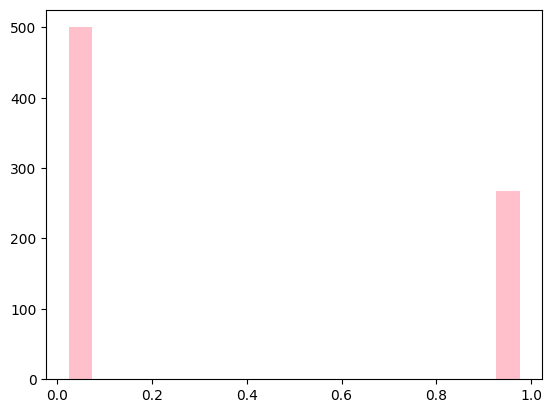

In [602]:
plt.hist(data['Outcome'],rwidth=0.5,color="pink")
plt.show()

In [603]:
data['Outcome'] = data['Outcome'].fillna(data['Outcome'].median())

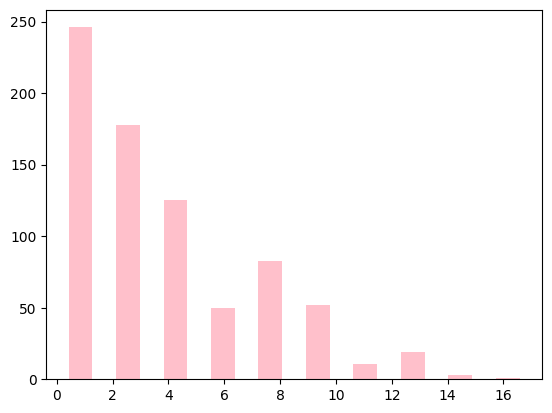

In [604]:
plt.hist(data['Pregnancies'],rwidth=0.5,color="pink")
plt.show()

In [605]:
data['Pregnancies'] = data['Pregnancies'].fillna(data['Pregnancies'].median())

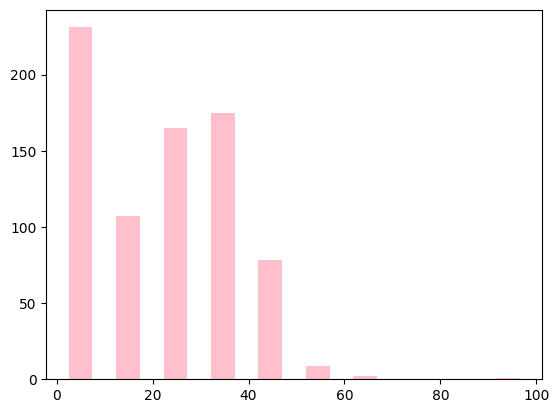

In [606]:
plt.hist(data['SkinThickness'],rwidth=0.5,color="pink")
plt.show()

In [607]:
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())

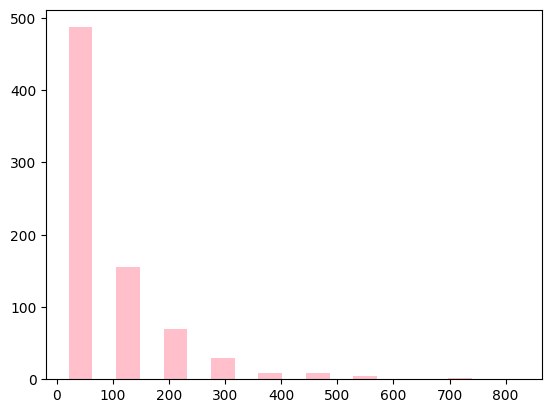

In [608]:
plt.hist(data['Insulin'],rwidth=0.5,color="pink")
plt.show()

In [609]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())

In [610]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**3.Outlier detection**

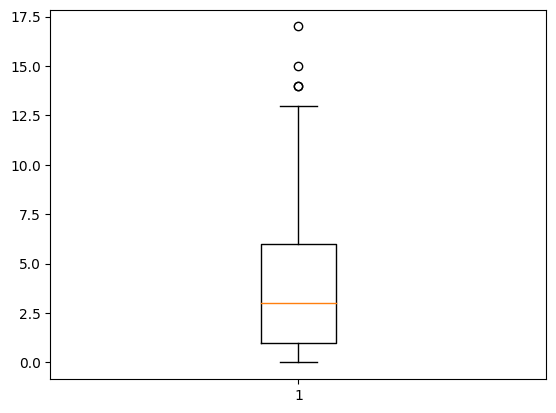

In [611]:
plt.boxplot(data['Pregnancies'])
plt.show()

In [612]:
q1 = data['Pregnancies'].quantile(0.25)
q2 = data['Pregnancies'].quantile(0.5)
q3 = data['Pregnancies'].quantile(0.75)

In [613]:
iqr = q3 -q1

In [614]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [615]:
print(up_lim,low_lim)

13.5 -6.5


In [616]:
data[(data['Pregnancies']>up_lim) | (data['Pregnancies']<low_lim)].index

Int64Index([88, 159, 298, 455], dtype='int64')

In [617]:
data.drop([88, 159, 298, 455],inplace = True)

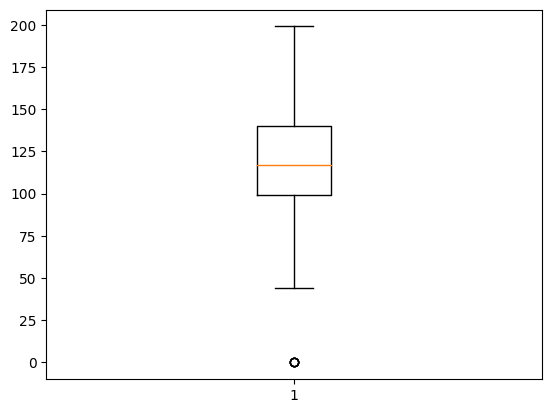

In [618]:
plt.boxplot(data['Glucose'])
plt.show()

In [619]:
q1 = data['Glucose'].quantile(0.25)
q2 = data['Glucose'].quantile(0.5)
q3 = data['Glucose'].quantile(0.75)

In [620]:
iqr = q3 -q1

In [621]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [622]:
print(up_lim,low_lim)

201.5 37.5


In [623]:
data[(data['Glucose']>up_lim) | (data['Glucose']<low_lim)].index

Int64Index([75, 182, 342, 349, 502], dtype='int64')

In [624]:
data.drop([75, 182, 342, 349, 502],inplace = True)

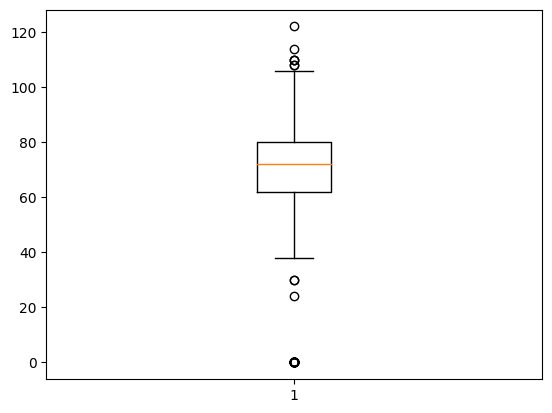

In [625]:
plt.boxplot(data['BloodPressure'])
plt.show()

In [626]:
q1 = data['BloodPressure'].quantile(0.25)
q2 = data['BloodPressure'].quantile(0.50)
q3 = data['BloodPressure'].quantile(0.75)

In [627]:
iqr = q3 -q1

In [628]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [629]:
print(up_lim)
print(low_lim)

107.0
35.0


In [630]:
data[(data['BloodPressure']>up_lim) | (data['BloodPressure']<low_lim)].index

Int64Index([  7,  15,  18,  43,  49,  60,  78,  81,  84, 106, 125, 172, 177,
            193, 222, 261, 266, 269, 300, 332, 336, 347, 357, 362, 426, 430,
            435, 453, 468, 484, 494, 522, 533, 535, 549, 589, 597, 601, 604,
            619, 643, 691, 697, 703, 706],
           dtype='int64')

In [631]:
data.drop([  0,   1,   3,   5,   8,   9,  10,  11,  14,  16,755, 756, 757, 758, 759, 761, 763, 764, 765, 767],inplace = True)

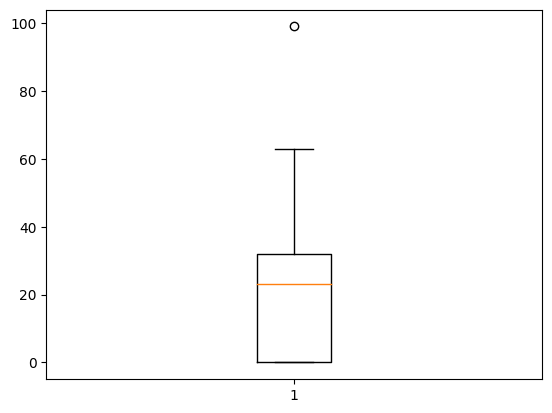

In [632]:
plt.boxplot(data['SkinThickness'])
plt.show()

In [633]:
q1 = data['SkinThickness'].quantile(0.25)
q2 = data['SkinThickness'].quantile(0.5)
q3 = data['SkinThickness'].quantile(0.75)

In [634]:
iqr = q3 -q1

In [635]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [636]:
print(up_lim,low_lim)

80.0 -48.0


In [637]:
data[(data['SkinThickness']>up_lim) | (data['SkinThickness']<low_lim)].index

Int64Index([579], dtype='int64')

In [638]:
data.drop([579],inplace = True)

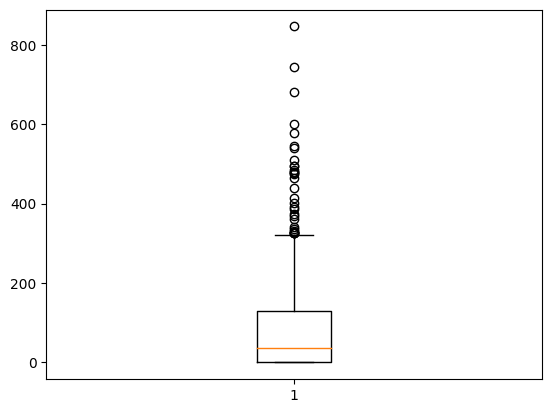

In [639]:
plt.boxplot(data['Insulin'])
plt.show()

In [640]:
q1 = data['Insulin'].quantile(0.25)
q2 = data['Insulin'].quantile(0.5)
q3 = data['Insulin'].quantile(0.75)

In [641]:
iqr = q3 -q1

In [642]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [643]:
print(up_lim,low_lim)

324.375 -194.625


In [644]:
data[(data['Insulin']>up_lim) | (data['Insulin']<low_lim)].index

Int64Index([ 13,  54, 111, 139, 153, 186, 220, 228, 231, 247, 248, 258, 286,
            296, 360, 370, 375, 392, 409, 415, 480, 486, 519, 574, 584, 645,
            655, 695, 707, 710, 715, 753],
           dtype='int64')

In [645]:
data.drop([  6,  13,  18,  19,  20,  24,  25,  27,  28,  31,736, 738, 740, 741, 742, 744, 745, 748, 751, 753],inplace = True)

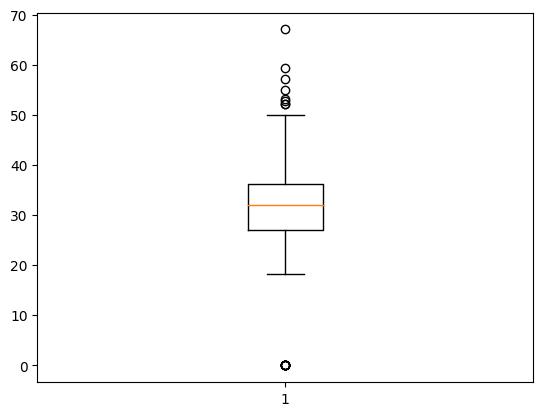

In [646]:
plt.boxplot(data['BMI'])
plt.show()

In [647]:
q1 = data['BMI'].quantile(0.25)
q2 = data['BMI'].quantile(0.5)
q3 = data['BMI'].quantile(0.75)

In [648]:
iqr = q3 -q1

In [649]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [650]:
print(up_lim,low_lim)

50.0 13.400000000000002


In [651]:
data[(data['BMI']>up_lim) | (data['BMI']<low_lim)].index

Int64Index([ 49,  60,  81, 120, 125, 145, 177, 193, 247, 303, 371, 426, 445,
            494, 522, 673, 684, 706],
           dtype='int64')

In [652]:
data.drop([177],inplace = True)

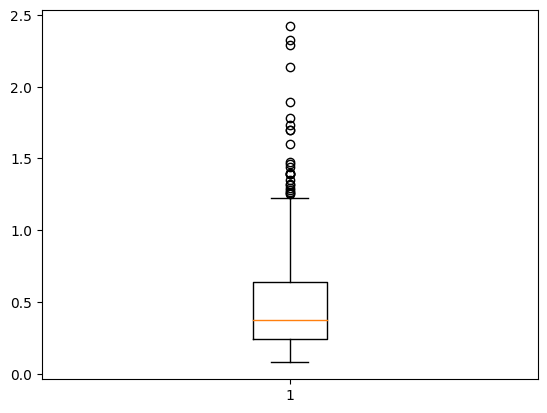

In [653]:
plt.boxplot(data['DiabetesPedigreeFunction'])
plt.show()

In [654]:
q1 = data['DiabetesPedigreeFunction'].quantile(0.25)
q2 = data['DiabetesPedigreeFunction'].quantile(0.5)
q3 = data['DiabetesPedigreeFunction'].quantile(0.75)

In [655]:
iqr = q3 -q1

In [656]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [657]:
print(up_lim,low_lim)

1.2265000000000001 -0.34550000000000003


In [658]:
data[(data['DiabetesPedigreeFunction']>up_lim) | (data['DiabetesPedigreeFunction']<low_lim)].index

Int64Index([  4,  12,  39,  45,  58, 147, 187, 228, 243, 259, 308, 330, 370,
            371, 383, 395, 445, 534, 593, 606, 618, 621, 622, 659, 661],
           dtype='int64')

In [659]:
data.drop([4,  12,  39,  45,  58, 100, 147, 187, 218, 228, 243, 245, 259,
            292, 308, 330, 370, 371, 383, 395, 445, 534, 593, 606, 618, 621,
            622, 659, 661],inplace = True)

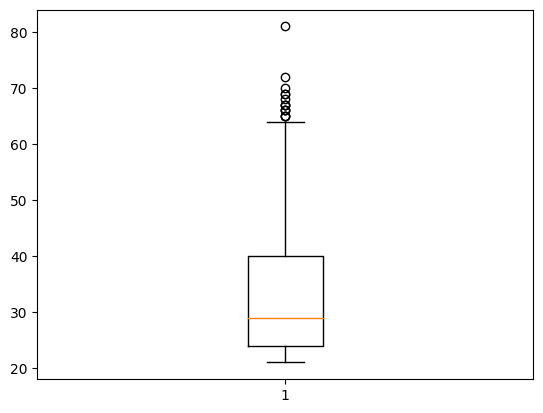

In [660]:
plt.boxplot(data['Age'])
plt.show()

In [661]:
q1 = data['Age'].quantile(0.25)
q2 = data['Age'].quantile(0.5)
q3 = data['Age'].quantile(0.75)

In [662]:
iqr = q3 -q1

In [663]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [664]:
print(up_lim,low_lim)

64.0 0.0


In [665]:
data[(data['Age']>up_lim) | (data['Age']<low_lim)].index

Int64Index([123, 148, 221, 294, 362, 363, 453, 459, 489, 495, 537, 552, 666,
            674, 684],
           dtype='int64')

In [666]:
data.drop([123, 363, 459, 489, 537, 666, 674, 684],inplace = True)

In [667]:
data.shape

(680, 9)

In [668]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**4.Encoding**

In [669]:
y=data['Outcome']
x= [ ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [670]:
x = pd.get_dummies(data)

**5.Create the model**

In [671]:
data['Outcome'].unique()

array([1, 0])

In [672]:
from sklearn.model_selection import train_test_split

In [673]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 42)

**logistic regression model**

In [674]:

from sklearn.linear_model import LogisticRegression

In [675]:
log_reg = LogisticRegression()

In [676]:
log_reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [677]:
y_pred = log_reg.predict(x_test)

In [678]:
from sklearn.metrics import accuracy_score

In [679]:
accuracy_score(y_test,y_pred)

1.0

In [680]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [681]:
confusion_matrix(y_test,y_pred)

array([[96,  0],
       [ 0, 40]])

In [682]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0])

In [683]:
precision_score(y_test,y_pred)

1.0

In [684]:
recall_score(y_test,y_pred)

1.0

In [685]:
f1_score(y_test,y_pred)

1.0

**KNN (K-Nearest Neighbors Algorithm)**

In [686]:
from sklearn.neighbors import KNeighborsClassifier

In [687]:
metric_k=[]
n = np.arange(3,15)

for k in n:
  classifier = KNeighborsClassifier(n_neighbors = k,metric ='euclidean')
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [688]:
metric_k

[0.7132352941176471,
 0.7205882352941176,
 0.7352941176470589,
 0.7426470588235294,
 0.7647058823529411,
 0.75,
 0.7205882352941176,
 0.7794117647058824,
 0.7573529411764706,
 0.7867647058823529,
 0.7647058823529411,
 0.7867647058823529]

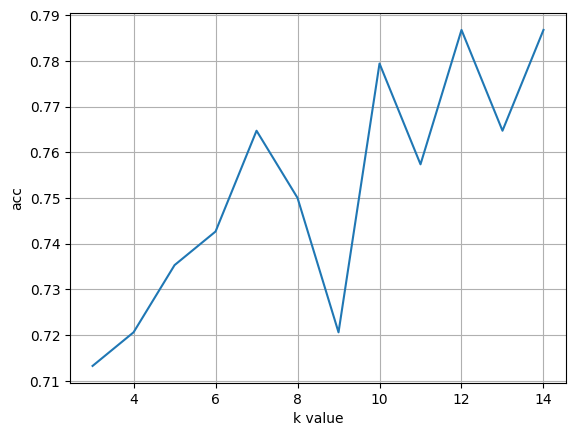

In [689]:
plt.plot(n,metric_k,)
plt.xlabel('k value')
plt.ylabel('acc')
plt.grid()
plt.show()

In [690]:
classifier = KNeighborsClassifier(n_neighbors = 14,metric ='euclidean')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [691]:
accuracy_score(y_test,y_pred)

0.7867647058823529

In [692]:
confusion_matrix(y_test,y_pred)

array([[82, 14],
       [15, 25]])

In [693]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0])

In [694]:
precision_score(y_test,y_pred)

0.6410256410256411

In [695]:
recall_score(y_test,y_pred)

0.625

In [696]:
f1_score(y_test,y_pred)

0.6329113924050633

**SVM Kernels**

In [697]:
from sklearn.svm import SVC

In [698]:
sv = SVC(kernel = 'linear')

In [699]:
sv.fit(x_train,y_train)

SVC(kernel='linear')

In [700]:
y_pred = sv.predict(x_test)

In [701]:
accuracy_score(y_test,y_pred)

1.0

In [702]:
confusion_matrix(y_test,y_pred)

array([[96,  0],
       [ 0, 40]])

In [703]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0])

In [704]:
precision_score(y_test,y_pred)

1.0

In [705]:
recall_score(y_test,y_pred)

1.0

In [706]:
f1_score(y_test,y_pred)

1.0

**Naive Bayes**

In [707]:
from sklearn.naive_bayes import GaussianNB

In [708]:
bay = GaussianNB()

In [709]:
bay.fit(x_train,y_train)

GaussianNB()

In [710]:
nb_pred = bay.predict(x_test)

In [711]:
accuracy_score(y_test,nb_pred)

1.0

In [712]:
confusion_matrix(y_test,y_pred)

array([[96,  0],
       [ 0, 40]])

In [713]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0])

In [714]:
precision_score(y_test,y_pred)

1.0

In [715]:
recall_score(y_test,y_pred)

1.0

In [716]:
f1_score(y_test,y_pred)

1.0

**Scaling**

In [717]:
from sklearn.preprocessing import StandardScaler

In [718]:
scaler =  StandardScaler()

In [719]:
X_train_scaled = scaler.fit_transform(x_train)

In [720]:
X_test_scaled = scaler.transform(x_test)

In [721]:
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [722]:
y_log_scaled_pred=log_reg.predict(X_test_scaled)

In [723]:
accuracy_score(y_test,y_log_scaled_pred)

1.0

In [724]:
confusion_matrix(y_test,y_pred)

array([[96,  0],
       [ 0, 40]])

In [725]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0])

In [726]:
precision_score(y_test,y_pred)

1.0

In [727]:
recall_score(y_test,y_pred)

1.0

In [728]:
f1_score(y_test,y_pred)

1.0

In [729]:
pred1 = log_reg.predict(X_test_scaled)

In [730]:
outcome = np.array([[0,6,148,72,	35,0,33.6,0.627,50]])
outcome_scaled =scaler.transform(outcome)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [731]:
check_pred =log_reg.predict (outcome_scaled)
if check_pred[0]==0:
   print('no')
else:
     print('yes')


yes


In [732]:
#KNN
classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=14)

In [733]:
y_classifier_scaled_pred=classifier.predict(X_test_scaled)

In [734]:
accuracy_score(y_test,y_classifier_scaled_pred)

1.0

In [735]:
confusion_matrix(y_test,y_pred)

array([[96,  0],
       [ 0, 40]])

In [736]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0])

In [737]:
precision_score(y_test,y_pred)

1.0

In [738]:
recall_score(y_test,y_pred)

1.0

In [739]:
f1_score(y_test,y_pred)

1.0

In [740]:
pred1 = classifier.predict(X_test_scaled)

In [741]:
outcome = np.array([[0,6,148,72,	35,0,33.6,0.627,50]])
outcome_scaled =scaler.transform(outcome)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [742]:
check_pred =classifier.predict (outcome_scaled)
if check_pred[0]==0:
   print('no')
else:
     print('yes')

yes


In [743]:
#Naive Bayes
bay.fit(X_train_scaled,y_train)


GaussianNB()

In [744]:
y_bay_scaled_pred=bay.predict(X_test_scaled)

In [745]:
accuracy_score(y_test,y_bay_scaled_pred)

1.0

In [746]:
confusion_matrix(y_test,y_pred)

array([[96,  0],
       [ 0, 40]])

In [747]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0])

In [748]:
precision_score(y_test,y_pred)

1.0

In [749]:
recall_score(y_test,y_pred)

1.0

In [750]:
f1_score(y_test,y_pred)

1.0

In [751]:
pred1 = bay.predict(X_test_scaled)

In [752]:
outcome = np.array([[0,6,148,72,	35,0,33.6,0.627,50]])
outcome_scaled =scaler.transform(outcome)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [753]:
check_pred =bay.predict (outcome_scaled)
if check_pred[0]==0:
   print('no')
else:
     print('yes')

yes


In [754]:
#SVM Kernels
sv.fit(X_train_scaled,y_train)


SVC(kernel='linear')

In [755]:
y_sv_scaled_pred=bay.predict(X_test_scaled)

In [756]:
accuracy_score(y_test,y_sv_scaled_pred)

1.0

In [757]:
confusion_matrix(y_test,y_pred)

array([[96,  0],
       [ 0, 40]])

In [758]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0])

In [759]:
precision_score(y_test,y_pred)

1.0

In [760]:
recall_score(y_test,y_pred)

1.0

In [761]:
f1_score(y_test,y_pred)

1.0

In [762]:
pred1 = sv.predict(X_test_scaled)

In [763]:
outcome = np.array([[0,6,148,72,	35,0,33.6,0.627,50]])
outcome_scaled =scaler.transform(outcome)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [764]:
check_pred =sv.predict (outcome_scaled)
if check_pred[0]==0:
   print('no')
else:
     print('yes')

yes
